## PRINCIPAL COMPONENT ANALYSIS (PCA) and K-MEANS CLUSTERING

#### PATIENT RISK PHENOTYPING AND ANALYSIS

### Introduction
This notebook demonstrates the application of Principal Component Analysis (PCA) for dimensionality reduction and K-Means Clustering for patient risk phenotyping. The goal is to identify distinct patient groups based on their clinical data, which can be valuable for personalized healthcare strategies.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Loading and Initial Inspection
This step loads the `clinical_data.csv` file into a Pandas DataFrame. The `.head()` method is then used to display the first few rows of the dataset, providing a quick overview of its structure, column names, and the types of values it contains.

In [24]:
df = pd.read_csv("clinical_data.csv")
df.head()

,Age,BMI,HbA1c_Result,Avg_Glucose_mgdL,Systolic_BP_Reading1,Systolic_BP_Reading2,Diastolic_BP,LDL_Cholesterol,HDL_Cholesterol,Creatinine_mgdL,Physical_Activity_Score
0,48.417560,29.628513,5.685127,116.463149,112.115482,110.318652,73.745047,118.710552,49.900269,1.259637,2
1,56.377885,34.947925,9.779516,233.972109,149.630864,150.312094,94.737184,180.377365,26.715220,2.089484,3
2,60.205081,30.114892,4.973868,96.050003,127.789649,127.572392,81.507335,144.350408,41.281957,1.299831,2
3,59.331436,32.230223,6.662076,144.501587,141.502852,138.801408,87.990004,139.072956,31.644154,0.864839,4
4,52.116149,20.626074,4.939766,95.071277,121.388384,122.053012,75.587571,125.771575,59.326226,1.012098,1


### DATA CLEANING & DESCRIPTIVE STATISTICS
This section focuses on preparing the raw clinical dataset for analysis. It involves checking for missing values, imputing them to ensure data completeness, and summarizing the key statistical properties of each feature. This step is crucial for ensuring the quality and reliability of subsequent analyses like PCA and clustering.

In [25]:
df.shape

(500, 11)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      500 non-null    float64
 1   BMI                      475 non-null    float64
 2   HbA1c_Result             500 non-null    float64
 3   Avg_Glucose_mgdL         500 non-null    float64
 4   Systolic_BP_Reading1     500 non-null    float64
 5   Systolic_BP_Reading2     500 non-null    float64
 6   Diastolic_BP             500 non-null    float64
 7   LDL_Cholesterol          475 non-null    float64
 8   HDL_Cholesterol          500 non-null    float64
 9   Creatinine_mgdL          500 non-null    float64
 10  Physical_Activity_Score  500 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 43.1 KB


In [27]:
df['BMI'].isnull().sum()

np.int64(25)

In [28]:
df['BMI']= df['BMI'].fillna(df['BMI'].median())  

In [29]:
df['LDL_Cholesterol'] = df['LDL_Cholesterol'].fillna(df['LDL_Cholesterol'].median())  

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      500 non-null    float64
 1   BMI                      500 non-null    float64
 2   HbA1c_Result             500 non-null    float64
 3   Avg_Glucose_mgdL         500 non-null    float64
 4   Systolic_BP_Reading1     500 non-null    float64
 5   Systolic_BP_Reading2     500 non-null    float64
 6   Diastolic_BP             500 non-null    float64
 7   LDL_Cholesterol          500 non-null    float64
 8   HDL_Cholesterol          500 non-null    float64
 9   Creatinine_mgdL          500 non-null    float64
 10  Physical_Activity_Score  500 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 43.1 KB


### Data Information and Missing Value Handling
The `df.info()` command provides a concise summary of the DataFrame, including the number of entries, column names, non-null counts, and data types for each column. This output is critical for identifying columns with missing values and understanding the overall data structure.

Following the inspection, missing values in 'BMI' and 'LDL_Cholesterol' columns are imputed using their respective median values. This strategy is robust to outliers and maintains the distribution of the data better than mean imputation for skewed distributions. The `df.info()` output after imputation confirms that all columns now have 500 non-null entries, indicating successful handling of missing data.

### Data Information and Missing Value Handling
The `df.info()` command provides a concise summary of the DataFrame, including the number of entries, column names, non-null counts, and data types for each column. This output is critical for identifying columns with missing values and understanding the overall data structure.

Following the inspection, missing values in 'BMI' and 'LDL_Cholesterol' columns are imputed using their respective median values. This strategy is robust to outliers and maintains the distribution of the data better than mean imputation for skewed distributions. The `df.info()` output after imputation confirms that all columns now have 500 non-null entries, indicating successful handling of missing data.

In [31]:
df.columns

Index(['Age', 'BMI', 'HbA1c_Result', 'Avg_Glucose_mgdL',
       'Systolic_BP_Reading1', 'Systolic_BP_Reading2', 'Diastolic_BP',
       'LDL_Cholesterol', 'HDL_Cholesterol', 'Creatinine_mgdL',
       'Physical_Activity_Score'],
      dtype='object')

### Descriptive Statistics Overview
The `df.describe()` method provides a summary of the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN values. For each numerical column, it shows count, mean, standard deviation, minimum, maximum, and the 25th, 50th (median), and 75th percentiles. This helps in understanding the spread and potential skewness of features, which is valuable for feature engineering and model selection.

Following this, the DataFrame is rounded to two decimal places for improved readability in subsequent outputs.

In [32]:
# Rounding off the values to 2 decimal places for better readability
df = df.round(2)
df.head()

,Age,BMI,HbA1c_Result,Avg_Glucose_mgdL,Systolic_BP_Reading1,Systolic_BP_Reading2,Diastolic_BP,LDL_Cholesterol,HDL_Cholesterol,Creatinine_mgdL,Physical_Activity_Score
0,48.42,29.63,5.69,116.46,112.12,110.32,73.75,118.71,49.90,1.26,2
1,56.38,34.95,9.78,233.97,149.63,150.31,94.74,180.38,26.72,2.09,3
2,60.21,30.11,4.97,96.05,127.79,127.57,81.51,144.35,41.28,1.30,2
3,59.33,32.23,6.66,144.50,141.50,138.80,87.99,139.07,31.64,0.86,4
4,52.12,20.63,4.94,95.07,121.39,122.05,75.59,125.77,59.33,1.01,1


### Age Distribution
This histogram visualizes the distribution of patient ages within the dataset. It helps to understand the age demographics of the patient cohort, revealing if the data is skewed towards a particular age group or if it's evenly distributed. This is important for understanding the generalizability of any findings to broader populations.

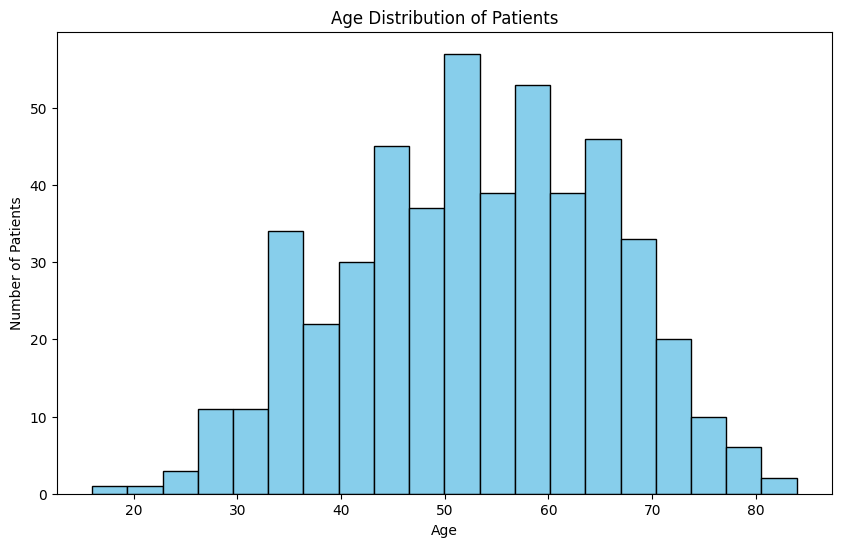

In [33]:
# Graphical analysis of the dataset
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

### HbA1c vs Average Glucose Level
This scatter plot visualizes the relationship between HbA1c results and average glucose levels. HbA1c is a key indicator of long-term blood sugar control, while average glucose provides a more immediate snapshot. A strong positive correlation is expected, and deviations could indicate specific patient conditions or data anomalies.

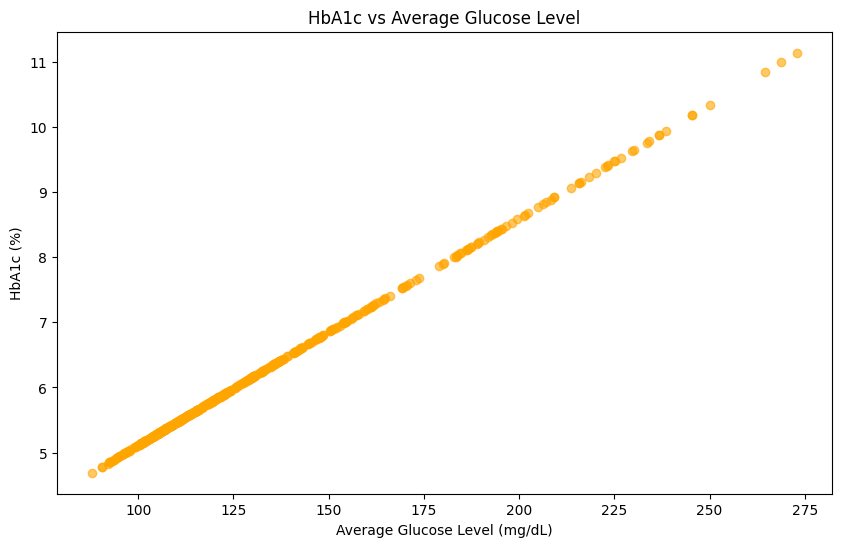

In [34]:
# Scatter plot of HbA1c vs Fasting Blood Sugar
plt.figure(figsize=(10,6))
plt.scatter(df['Avg_Glucose_mgdL'], df['HbA1c_Result'], color='orange', alpha=0.6)
plt.title('HbA1c vs Average Glucose Level')
plt.xlabel('Average Glucose Level (mg/dL)')
plt.ylabel('HbA1c (%)')
plt.show()

### Data Information and Missing Value Handling
The `df.info()` command provides a concise summary of the DataFrame, including the number of entries, column names, non-null counts, and data types for each column. This output is critical for identifying columns with missing values and understanding the overall data structure.

Following the inspection, missing values in 'BMI' and 'LDL_Cholesterol' columns are imputed using their respective median values. This strategy is robust to outliers and maintains the distribution of the data better than mean imputation for skewed distributions. The `df.info()` output after imputation confirms that all columns now have 500 non-null entries, indicating successful handling of missing data.

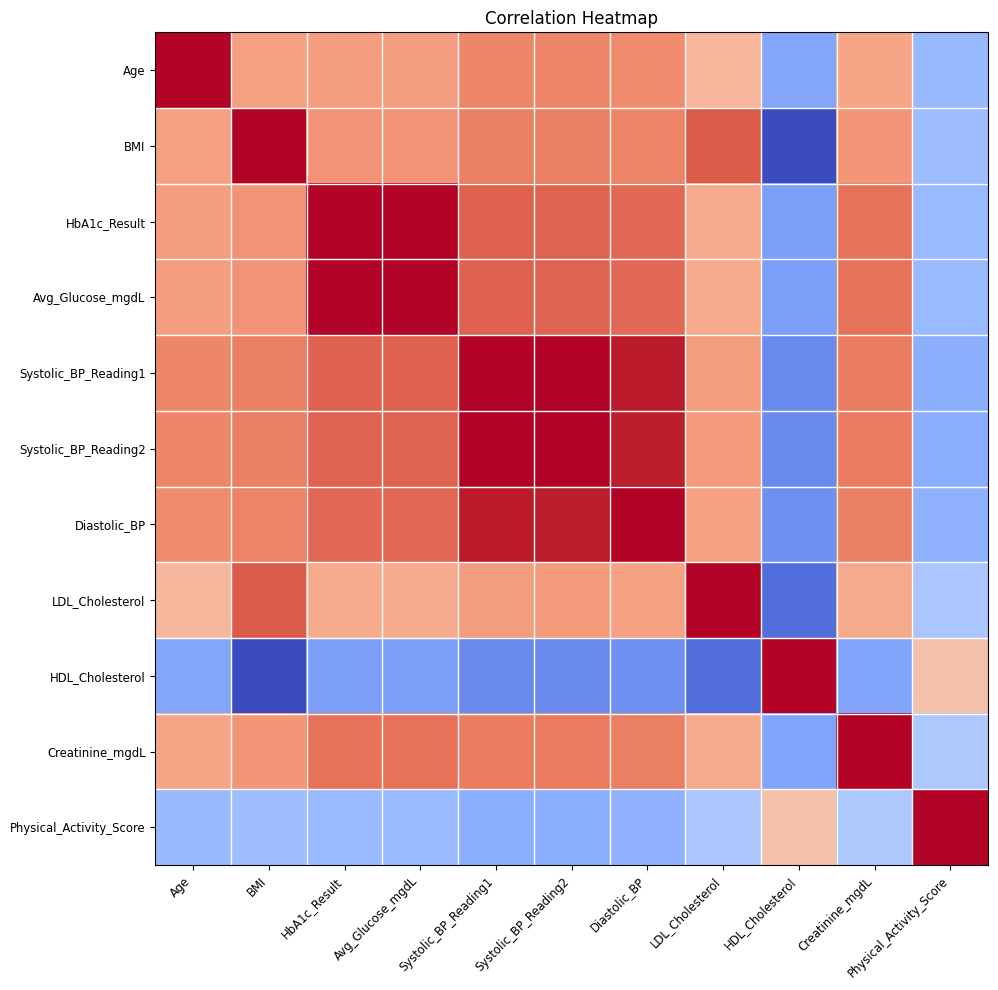

In [35]:
# Analyzing the correlation between variables
# The correlation heatmap
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(12,10));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.columns, ax = ax, cmap='coolwarm', title='Correlation Heatmap');


### Data Information and Missing Value Handling
The `df.info()` command provides a concise summary of the DataFrame, including the number of entries, column names, non-null counts, and data types for each column. This output is critical for identifying columns with missing values and understanding the overall data structure.

Following the inspection, missing values in 'BMI' and 'LDL_Cholesterol' columns are imputed using their respective median values. This strategy is robust to outliers and maintains the distribution of the data better than mean imputation for skewed distributions. The `df.info()` output after imputation confirms that all columns now have 500 non-null entries, indicating successful handling of missing data.

In [36]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Age,BMI,HbA1c_Result,Avg_Glucose_mgdL,Systolic_BP_Reading1,Systolic_BP_Reading2,Diastolic_BP,LDL_Cholesterol,HDL_Cholesterol,Creatinine_mgdL,Physical_Activity_Score
0,-0.372188,0.397829,-0.452405,-0.456282,-1.003916,-1.077230,-0.829450,-0.461962,0.410551,-0.009048,-0.708813
1,0.262537,1.423965,2.878655,2.878536,1.080650,1.104332,1.040684,1.988536,-1.597909,1.492987,-0.261894
2,0.567939,0.490412,-1.038802,-1.035498,-0.133078,-0.136196,-0.138062,0.556860,-0.336340,0.063339,-0.708813
3,0.497768,0.899324,0.337602,0.339465,0.628836,0.476430,0.439283,0.347056,-1.171610,-0.732921,0.185024
4,-0.077153,-1.338117,-1.063235,-1.063310,-0.488749,-0.437327,-0.665513,-0.181428,1.227625,-0.461469,-1.155731


### DIMENSIONALITY REDUCTION
##### PRINCIPAL COMPONENT ANALYSIS
This section applies Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while retaining as much variance as possible. PCA is a powerful technique that transforms the original features into a new set of uncorrelated variables called principal components, which are ordered by the amount of variance they explain.

### Applying Principal Component Analysis (PCA)
Here, PCA is initialized and applied to the `scaled_df`. The `fit_transform` method performs two actions: first, it fits the PCA model to the scaled data to learn the principal components, and then it transforms the data into the new principal component space. The result, `pca_result`, contains the data projected onto these principal components.

In [37]:
# Applying PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_df)

### PCA Scree Plot Interpretation
The scree plot visually represents the cumulative explained variance by each principal component. The 'elbow' in the plot (where the rate of decrease in WCSS sharply changes) typically indicates the optimal number of components to retain. Horizontal lines at 90% and 95% explained variance highlight the components needed to reach these thresholds, confirming the quantitative results from the previous step. This plot helps in visually confirming the choice of dimensionality reduction.

In [38]:
# Calculating the cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(explained_variance >= 0.90) + 1
n_components_95 = np.argmax(explained_variance >= 0.95) + 1

print(f'Number of components to explain 90% variance: {n_components_90}')
print(f'Number of components to explain 95% variance: {n_components_95}')

Number of components to explain 90% variance: 5
Number of components to explain 95% variance: 6


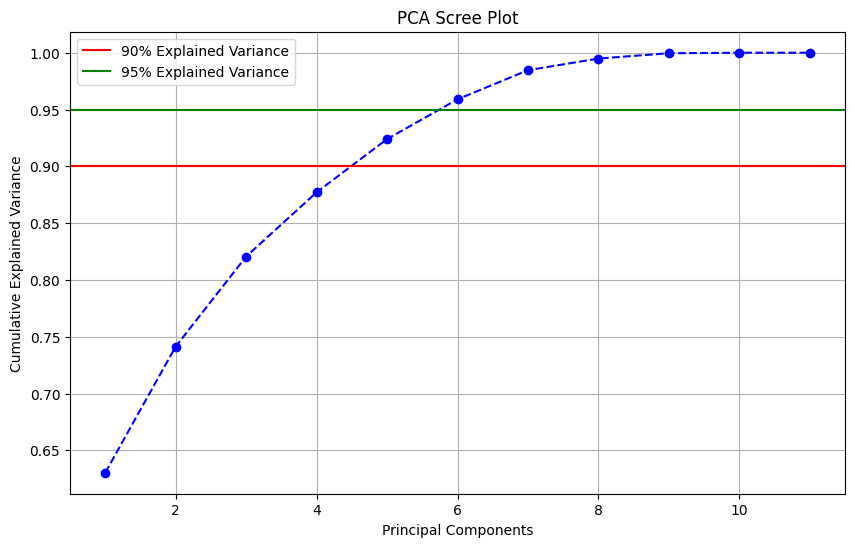

In [39]:
# Visualizing the PCA result using a scree plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('PCA Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='-', label='95% Explained Variance')
plt.grid()
plt.legend(loc='best')  
plt.show()

In [40]:
# Reducing the dataset to the optimal number of components
optimal_pca = PCA(n_components=n_components_90)
pca_reduced = optimal_pca.fit_transform(scaled_df)
pca_reduced.shape
pca_reduced = pd.DataFrame(pca_reduced, columns=[f'PC{i+1}' for i in range(n_components_90)])
pca_reduced.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.400381,0.440676,-0.602534,-0.857033,0.653939
1,4.944316,0.155398,1.495154,-1.803655,0.289409
2,-0.133375,1.231115,-1.094588,0.559665,0.281744
3,1.345086,0.812107,-0.032071,0.512010,-0.275323
4,-2.001956,-0.471557,-1.587238,-0.024776,0.068417


### KMeans CLUSTERING
This section applies K-Means clustering to the PCA-reduced data to identify natural groupings or segments within the patient population. K-Means is an unsupervised learning algorithm that partitions data into a predefined number of clusters, where each data point belongs to the cluster with the nearest mean (centroid).

### Elbow Method for Optimal Cluster Determination
The Elbow Method is used here to determine the optimal number of clusters for K-Means. It plots the Within-Cluster Sum of Squares (WCSS) against the number of clusters. The 'elbow point' on the plot, where the rate of decrease in WCSS sharply changes, suggests the optimal number of clusters. This visual diagnostic helps in making an informed decision about the `k` value for the K-Means algorithm.

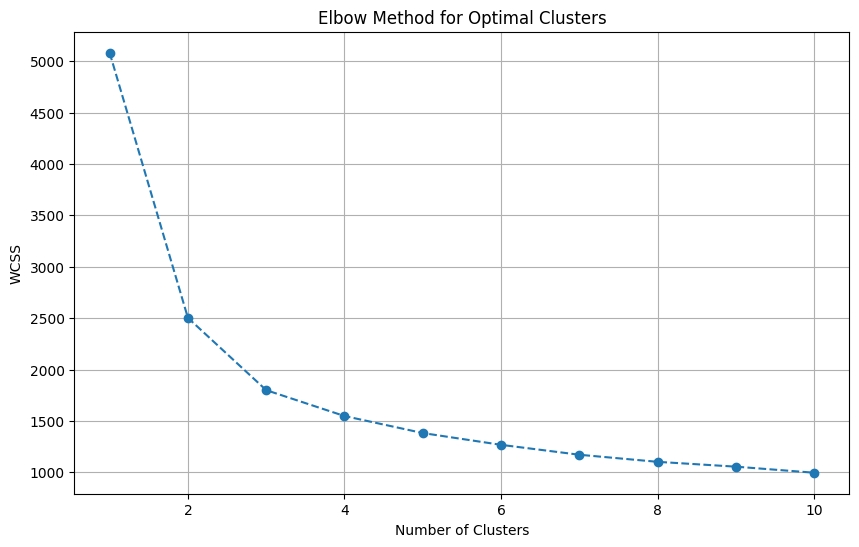

In [41]:
# Determining optimal clusters using the Elbow Method
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pca_reduced)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [42]:
# Applying KMeans clustering on the PCA-reduced data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(pca_reduced)
clusters = kmeans.labels_
pca_reduced['Cluster'] = clusters
pca_reduced.head()

,PC1,PC2,PC3,PC4,PC5,Cluster
0,-1.400381,0.440676,-0.602534,-0.857033,0.653939,1
1,4.944316,0.155398,1.495154,-1.803655,0.289409,0
2,-0.133375,1.231115,-1.094588,0.559665,0.281744,2
3,1.345086,0.812107,-0.032071,0.512010,-0.275323,2
4,-2.001956,-0.471557,-1.587238,-0.024776,0.068417,1


##### INTERPRETATION

### Cluster Interpretation: Centroids in Original Scale
To understand the characteristics of each patient cluster, the mean values of key features are calculated for each cluster, transformed back to their original scale. By examining these cluster centroids, we can interpret the phenotypic profiles of each patient group. For example, a cluster with high mean 'HbA1c_Result' and 'BMI' might represent a high-risk group for diabetes and obesity-related complications. This step translates the abstract clusters into clinically meaningful profiles.

In [43]:
# Add labels back to original df for interpretation
df['Cluster'] = clusters
# Calculate mean values for each cluster
cluster_means = df.groupby('Cluster').mean().round(2)

# Select key features for display to avoid clutter
key_features = ['Age', 'BMI', 'HbA1c_Result', 'Systolic_BP_Reading1', 'Creatinine_mgdL']
display_means = cluster_means[key_features]

print("Cluster Centroids (Original Scale):")
print(display_means)

Cluster Centroids (Original Scale):
           Age    BMI  HbA1c_Result  Systolic_BP_Reading1  Creatinine_mgdL
Cluster                                                                   
0        64.72  33.58          8.29                157.73             2.23
1        44.89  24.05          5.45                115.85             1.00
2        59.06  29.50          6.26                136.15             1.10


### Cluster Visualization in PCA Space
This scatter plot visualizes the identified patient clusters in the reduced PCA space, specifically using the first two principal components (PC1 and PC2). Each point represents a patient, colored according to their assigned cluster. This visualization helps to assess the separability of the clusters and how well the PCA components differentiate between different patient groups. Well-defined, distinct clusters suggest that the phenotyping is effective.

In [44]:
import seaborn as sns

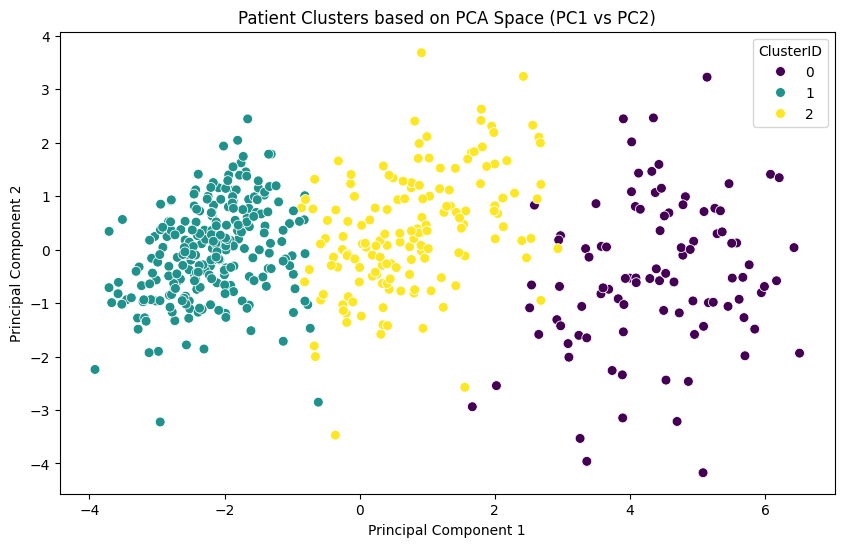

In [45]:
# Visualizing the Kmeans Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_reduced['PC1'], y=pca_reduced['PC2'], hue=clusters, palette='viridis', s=50)
plt.title('Patient Clusters based on PCA Space (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='ClusterID')
plt.show()

## Conclusion
This analysis successfully demonstrated the application of PCA for dimensionality reduction and K-Means clustering for patient phenotyping on a clinical dataset. By reducing the complexity of the data while retaining significant variance, we were able to identify distinct patient subgroups. The interpretation of cluster centroids and visualizations revealed unique characteristics for each group, potentially highlighting different risk profiles or disease progression patterns. This methodology provides a data-driven approach to segment patient populations, which can inform targeted interventions and personalized medicine strategies.